In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

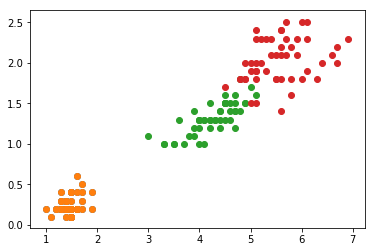

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#EF9A9A', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


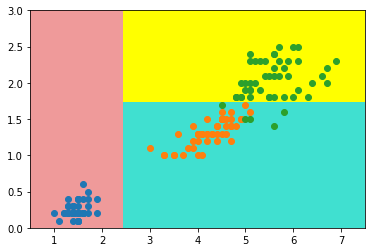

In [12]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## 信息熵曲线

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [15]:
x = np.linspace(0.01, 0.99, 200)

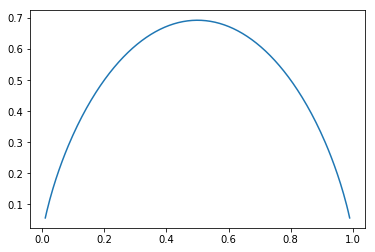

In [16]:
plt.plot(x, entropy(x))
plt.show()

## 模拟使用信息熵进行划分

In [17]:
# 四个参数分别为样本特征数据、样本目标数据、维度、阈值
def split(X, y, d, v):
    # 划分后左侧和右侧的索引数组
    index_l = (X[:, d] <= v)
    index_r = (X[:, d] > v)
    return X[index_l], X[index_r], y[index_l], y[index_r]

In [45]:
X = np.linspace(1, 10, 20)
X = X.reshape(5, 4)
y = 2 * X + 3

In [49]:
X

array([[  1.        ,   1.47368421,   1.94736842,   2.42105263],
       [  2.89473684,   3.36842105,   3.84210526,   4.31578947],
       [  4.78947368,   5.26315789,   5.73684211,   6.21052632],
       [  6.68421053,   7.15789474,   7.63157895,   8.10526316],
       [  8.57894737,   9.05263158,   9.52631579,  10.        ]])

In [46]:
y

array([[  5.        ,   5.94736842,   6.89473684,   7.84210526],
       [  8.78947368,   9.73684211,  10.68421053,  11.63157895],
       [ 12.57894737,  13.52631579,  14.47368421,  15.42105263],
       [ 16.36842105,  17.31578947,  18.26315789,  19.21052632],
       [ 20.15789474,  21.10526316,  22.05263158,  23.        ]])

In [56]:
X_l, X_r, y_l, y_r = split(X, y, 0, 5)

In [57]:
X_l

array([[ 1.        ,  1.47368421,  1.94736842,  2.42105263],
       [ 2.89473684,  3.36842105,  3.84210526,  4.31578947],
       [ 4.78947368,  5.26315789,  5.73684211,  6.21052632]])

In [55]:
y_l

array([[  5.        ,   5.94736842,   6.89473684,   7.84210526],
       [  8.78947368,   9.73684211,  10.68421053,  11.63157895]])

In [58]:
from collections import Counter
from math import log
# 计算信息熵时不关心样本特征，只关心样本目标数据的类别和每个类别的数量
def entropy(y):
    # 使用Counter生成字典，key为y的值，value为等于该值的元素数量
    counter_y = Counter(y)
    entropy_result = 0
    for num in counter_y.values():
        p = num / len(y)
        # 将所有类别的占比加起来，得到信息熵
        entropy_result += -p * log(p)
        
    return entropy_result

In [69]:
test_y = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3])
test_y1 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [73]:
entropy(test_y)

1.3421257227487469

In [74]:
entropy(test_y1)

0.5982695885852573

In [78]:
# 寻找最优信息熵
def try_split(X, y):
    
    # 最优信息熵初始取无穷大
    best_entropy = float('inf')
    # 最优维度和最优阈值，初始值为-1
    best_d, best_v = -1, -1
    
    # 对样本特征数据的每个维度，既每个特征进行搜索
    for d in range(X.shape[1]):
        # 在d这个维度上，将每两个样本点中间的值作为阈值
        # 对样本数据在d这个维度上进行排序，返回排序索引
        sorted_index = np.argsort(X[:, d])
        # 遍历每行样本数据，注意从第一行开始，因为需要用上一行的值和该行的值求均值
        for row in range(1, len(X)):
            # 如果两个值相等，那么均值无法区分这两个值，所以忽略这种情况
            if X[sorted_index[row-1], d] != X[sorted_index[row], d]:
                v = (X[sorted_index[row-1], d] + X[sorted_index[row], d]) / 2
                # 使用split()函数做划分
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                # 求划分后两部分的信息熵
                e = entropy(y_l) + entropy(y_r)
                # 保存最优信息熵、维度、阈值
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                    
    return best_entropy, best_d, best_v

In [79]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [81]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [82]:
X_l1, X_r1, y_l1, y_r1 = split(X, y, best_d, best_v)

In [83]:
entropy(y_l1)

0.0

In [85]:
entropy(y_r1)

0.6931471805599453

In [87]:
best_entropy2, best_d2, best_v2 = try_split(X_r1, y_r1)
print("best_entropy2 = ", best_entropy2)
print("best_d2 = ", best_d2)
print("best_v2 = ", best_v2)

best_entropy2 =  0.4132278899361904
best_d2 =  1
best_v2 =  1.75


In [88]:
X_l2, X_r2, y_l2, y_r2 = split(X_r1, y_r1, best_d2, best_v2)

In [89]:
entropy(y_l2)

0.30849545083110386

In [90]:
entropy(y_r2)

0.10473243910508653